In [1]:
#Imports y herramientas varias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

In [2]:
#Importar datos originales
path = "Datos/"

clientes = pnd.read_excel(path + "CREDITRISK_RAW.xlsx")

In [3]:
#Exploración de atributos
for key in clientes.keys():
    print( "Atributo:", key)
    print( "\tTipo:", clientes[key].dtype)

Atributo: ID
	Tipo: int64
Atributo: GENERO
	Tipo: object
Atributo: RENTA
	Tipo: float64
Atributo: EDAD
	Tipo: float64
Atributo: NIV_EDUC
	Tipo: object
Atributo: E_CIVIL
	Tipo: object
Atributo: COD_OFI
	Tipo: int64
Atributo: COD_COM
	Tipo: object
Atributo: CIUDAD
	Tipo: object
Atributo: Crédito_1
	Tipo: int64
Atributo: Crédito_2
	Tipo: int64
Atributo: Crédito_3
	Tipo: float64
Atributo: Crédito_4
	Tipo: int64
Atributo: Monto solicitado
	Tipo: float64
Atributo: Días de Mora
	Tipo: int64
Atributo: Monto Deuda Promedio
	Tipo: int64
Atributo: Número de meses inactivo
	Tipo: int64
Atributo: numero de cuotas
	Tipo: int64
Atributo: Aval
	Tipo: object
Atributo: PAGA
	Tipo: object


In [70]:
#Extracción de clientes con algún dato en blanco
empty_attribute_clients = clientes[clientes.isnull().any(axis=1)]
clean_clients = clientes[~clientes.isnull().any(axis=1)]

In [27]:
del clean_clients['ID']

for value in clean_clients['E_CIVIL'].unique():
    clean_clients[value.strip()] = clean_clients['E_CIVIL'].apply(lambda x: 1 if x == value else 0)

del clean_clients['E_CIVIL']
    
for value in clean_clients['NIV_EDUC'].unique():
    clean_clients[value.strip()] = clean_clients['NIV_EDUC'].apply(lambda x: 1 if x == value else 0)
    
del clean_clients['NIV_EDUC']

clean_clients = clean_clients[~(clean_clients[''] == 1)]

del clean_clients['']

del clean_clients['CIUDAD']

del clean_clients['COD_OFI']

llaves = clean_clients.keys()

for llave in llaves:
    if clean_clients[llave].dtype == 'int64' or clean_clients[llave].dtype == 'float64':
        continue
    if llave in ['ID']:
        continue
    values = clean_clients[llave].unique()
    dic = {}
    for i in range(len(values)):
        dic[values[i]] = i

    clean_clients[llave] = clean_clients[llave].apply(lambda x: dic[x])

#Paga: 0, No Paga: 1

/Users/synaptic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/synaptic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
clean_clients['Aval']

0       0
1       0
2       0
3       0
4       1
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      0
27      0
28      1
29      0
       ..
2264    0
2265    0
2266    0
2267    0
2268    0
2269    0
2270    0
2271    0
2272    1
2273    0
2274    0
2275    0
2276    0
2277    0
2278    1
2279    0
2280    0
2281    0
2282    1
2283    0
2284    0
2285    0
2286    0
2287    0
2288    0
2289    1
2290    0
2291    1
2292    0
2293    0
Name: Aval, Length: 2226, dtype: int64

In [21]:
len(clean_clients)

2226

In [22]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
clean_clients.to_excel(path + "limpio.xlsx")

In [29]:
clients_copy = clean_clients.copy()

y = clients_copy['PAGA']
del clients_copy['PAGA']

X = clients_copy.copy()

In [30]:
clf = tree.DecisionTreeClassifier()

cross_val_score(clf, X, y, cv=5)

array([0.89461883, 0.89438202, 0.9011236 , 0.8988764 , 0.88539326])

In [31]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X, y)

print("Random forest:\n")
for i in range(len(X.keys())):
    print(X.keys()[i], ':', clf.feature_importances_[i])
    

Random forest:

GENERO : 0.10234268647109471
RENTA : 0.0734116984816373
EDAD : 0.20410022207524942
COD_COM : 0.11501320235044141
Crédito_1 : 0.016025259076910235
Crédito_2 : 0.044472737621551114
Crédito_3 : 0.002784460847348632
Crédito_4 : 0.052051174585855994
Monto solicitado : 0.05424505336927785
Días de Mora : 0.02042337515019934
Monto Deuda Promedio : 0.03404326676023741
Número de meses inactivo : 0.0611824342021121
numero de cuotas : 0.04924125720958954
Aval : 0.013988344580301914
CAS : 0.02179401059446383
SEP : 0.003005797625418089
SOL : 0.013703687799563848
VIU : 0.005338531899442404
MED : 0.00846760062771584
TEC : 0.032312487675535996
UNV : 0.07110055902580295
EUN : 0.0005269430644505482
BAS : 0.00042520890579945785


In [32]:
mutual_info=mutual_info_classif(X, y)

print('Mutual information ingresos')
for i in range(len(X.keys())):
    print(X.keys()[i], ':', mutual_info[i])

Mutual information ingresos
GENERO : 0.12691753545416606
RENTA : 0.039054809858591666
EDAD : 0.20004479790673413
COD_COM : 0.2818252066091156
Crédito_1 : 0.03628677350101084
Crédito_2 : 0.06952405416338747
Crédito_3 : 0.02524981547525762
Crédito_4 : 0.056029369058358425
Monto solicitado : 0.06618219359579292
Días de Mora : 0.018531131718337646
Monto Deuda Promedio : 0.07656589141012993
Número de meses inactivo : 0.10375831935204705
numero de cuotas : 0.004452751772406893
Aval : 0.0
CAS : 0.048727009555516565
SEP : 0.005186130742999229
SOL : 0.047108535489247094
VIU : 0.008583260391419767
MED : 0.0
TEC : 0.08116572928183441
UNV : 0.12386185239327596
EUN : 0.0
BAS : 0.0


In [63]:
#Clustering aglomerativo jerarquico
#ward, complete
matrix = linkage(X, method='ward')

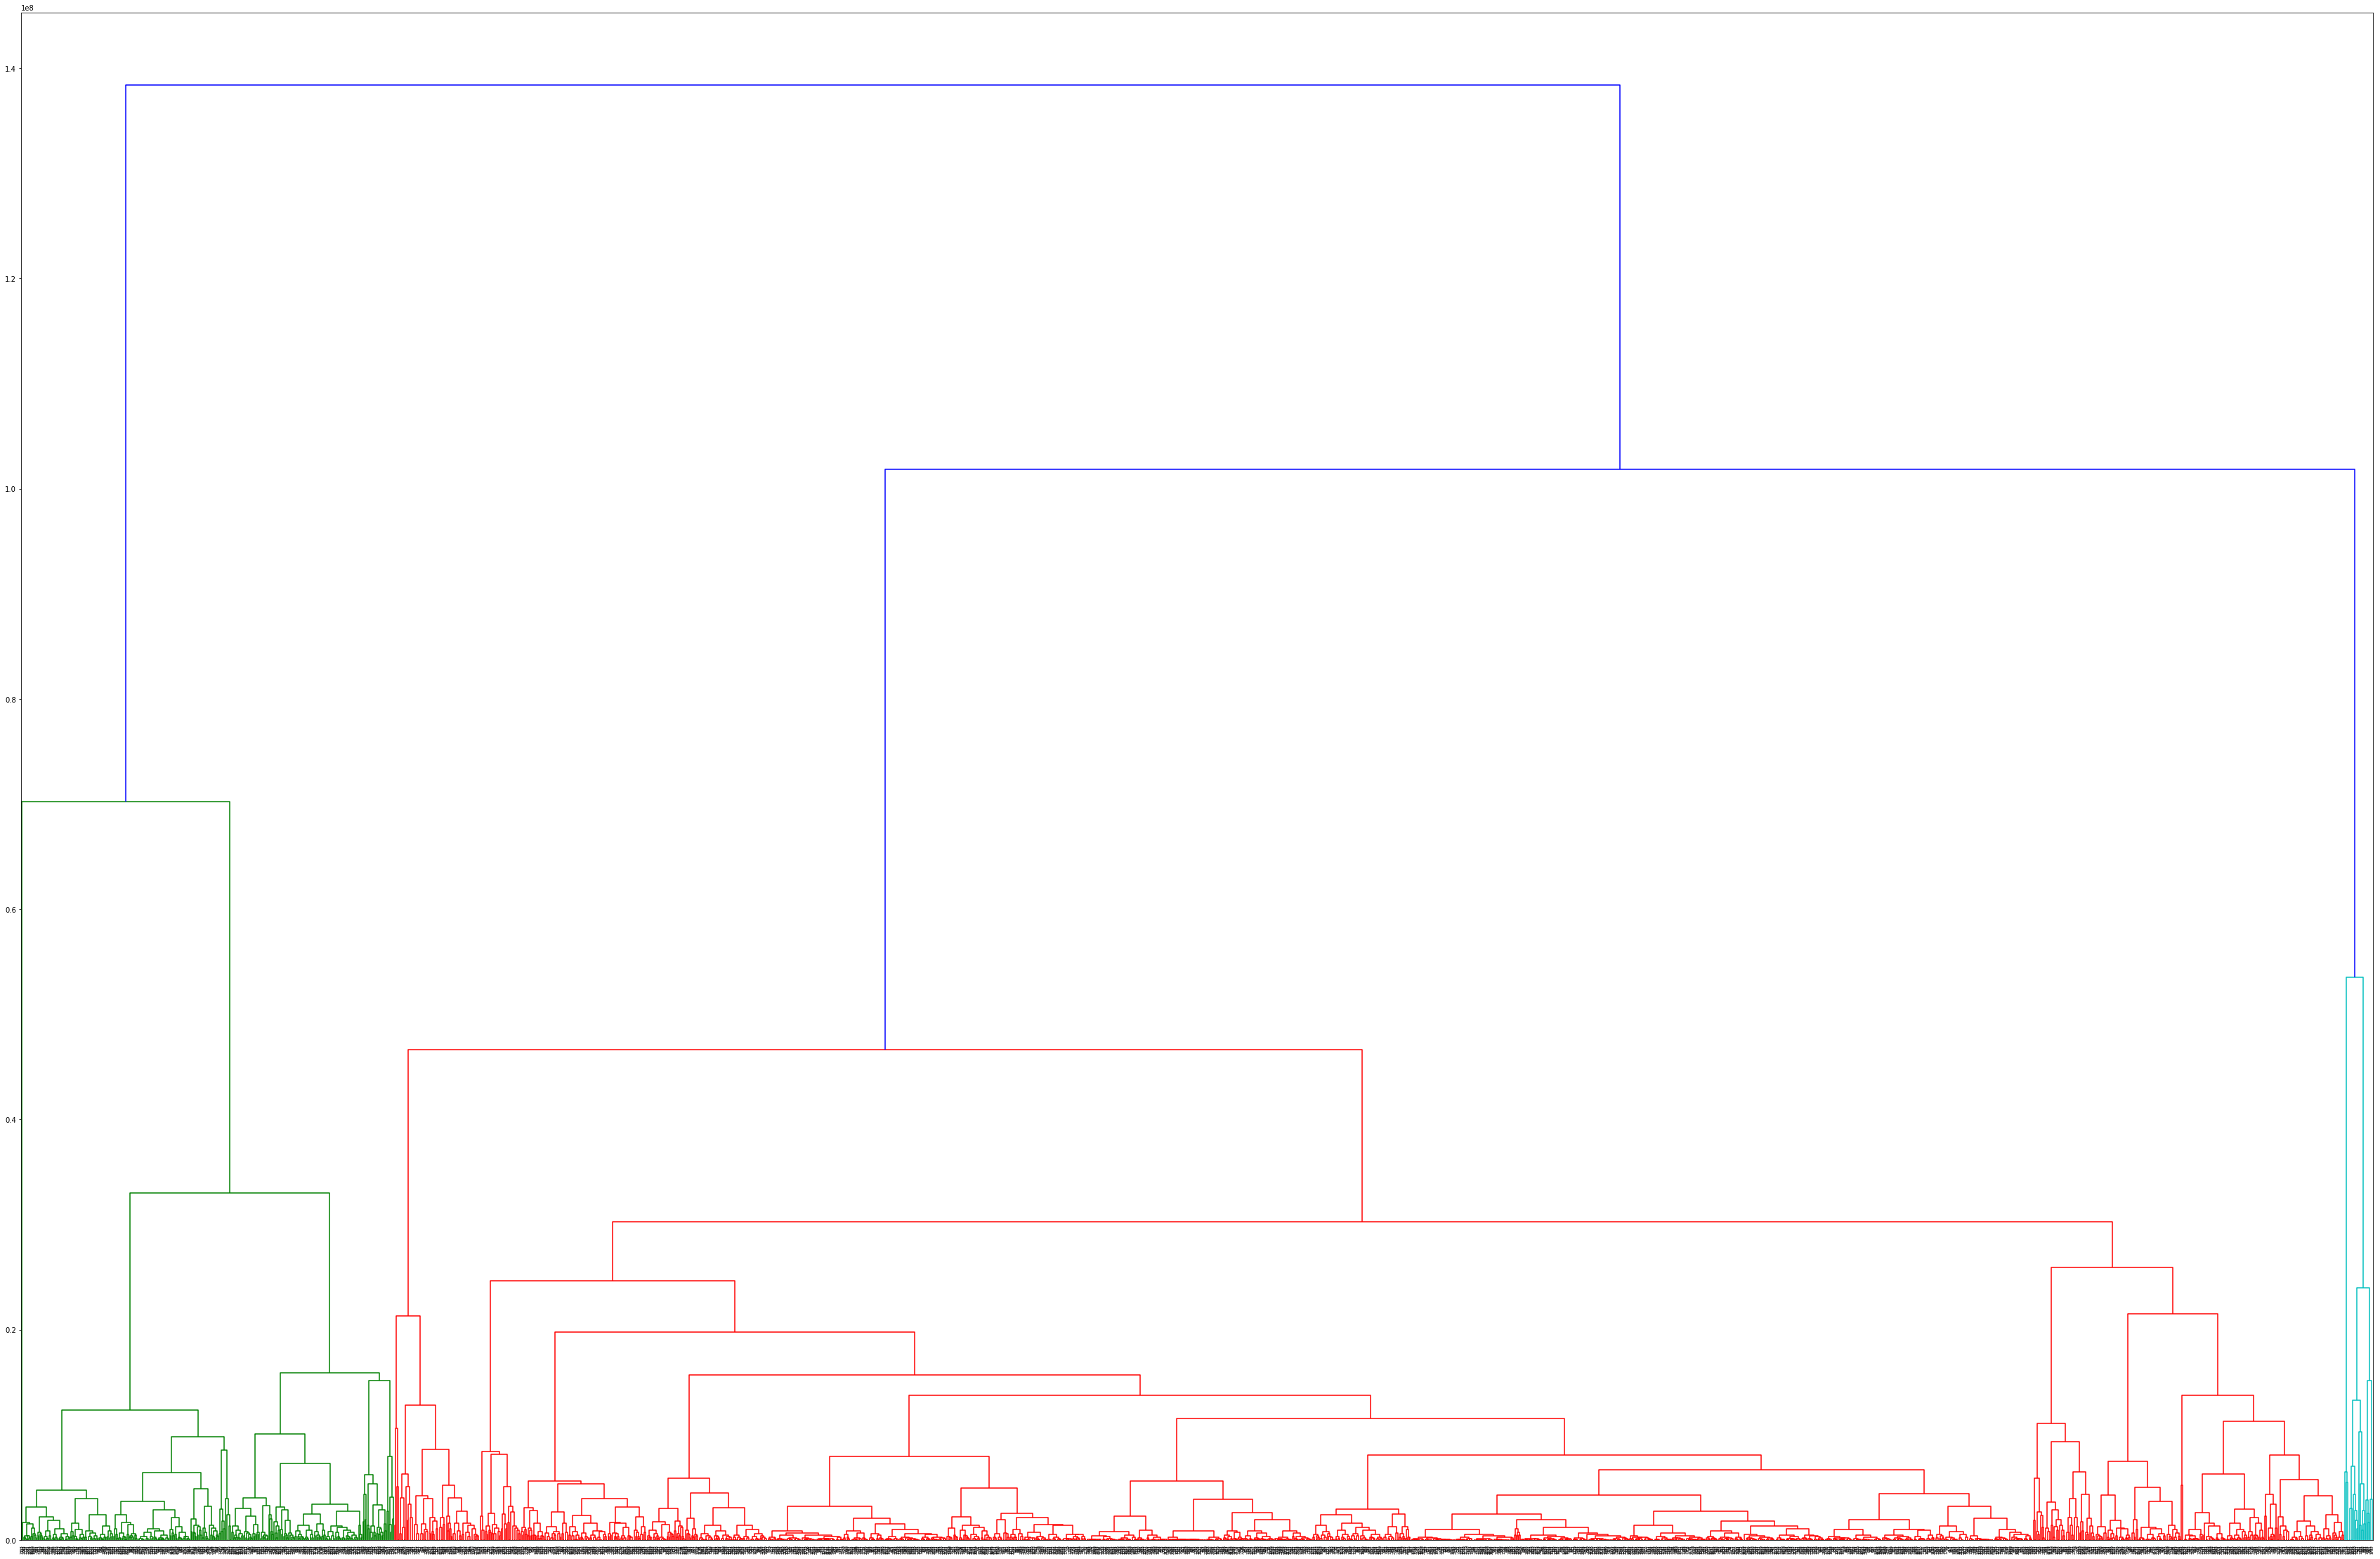

In [64]:
#Grafico del dendograma
plt.figure(figsize=(60, 40))
dendrogram(matrix)
plt.show()

In [65]:
#Formacion de los clusters a traves del clustering jerarquico aglomerativo
num_clusters=4
labels = pnd.DataFrame(fcluster(matrix, num_clusters, criterion='maxclust'))
for i in range(len(labels)):
    print(X.axes[0][i],labels[0][i])

0 3
1 4
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
10 3
11 3
12 3
13 3
14 3
15 3
16 1
17 3
18 3
19 3
20 3
21 3
22 1
23 3
24 3
25 3
26 3
27 1
28 3
29 3
30 3
31 3
32 3
33 3
34 3
35 3
36 3
37 1
38 3
39 3
40 1
41 3
42 3
43 1
44 3
45 3
46 3
47 1
48 1
49 1
50 3
51 3
52 3
53 3
54 3
55 3
56 3
57 1
58 3
59 3
60 3
61 3
62 1
63 3
64 3
65 3
66 1
67 3
68 3
69 3
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 3
78 3
79 3
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 1
88 3
89 1
90 3
91 3
92 3
93 1
94 3
95 1
96 3
97 3
98 3
99 3
100 3
101 3
103 3
104 3
105 3
106 3
107 3
108 1
109 3
110 3
111 3
112 3
113 1
114 3
115 3
116 3
117 3
118 3
119 1
120 3
121 1
122 3
123 3
124 3
125 3
126 3
127 3
128 3
129 3
130 3
131 3
132 3
133 1
134 3
135 3
136 3
137 3
138 3
139 3
140 3
141 3
143 1
144 3
145 3
146 1
147 3
148 3
149 3
150 3
151 3
152 3
153 3
154 3
155 3
156 3
157 3
158 3
159 3
160 3
161 3
162 1
163 3
164 3
165 3
166 1
167 3
168 3
169 3
170 3
171 3
172 3
173 3
174 3
175 1
176 3
177 3
178 3
179 3
180 1
181 3
183 1
184 3
185 3
186 3
187 3


1667 3
1668 3
1669 3
1670 3
1671 1
1673 3
1674 3
1675 3
1676 3
1677 3
1678 1
1679 3
1680 3
1681 3
1682 3
1683 3
1684 3
1685 1
1686 3
1687 3
1688 3
1689 3
1690 1
1691 3
1692 3
1693 3
1694 3
1695 3
1696 3
1697 3
1699 3
1700 1
1701 3
1702 3
1703 3
1704 3
1705 3
1706 3
1707 3
1708 1
1709 3
1710 3
1711 3
1712 3
1713 3
1714 3
1715 1
1716 3
1717 3
1718 1
1719 3
1720 1
1721 3
1722 3
1723 1
1724 3
1725 3
1726 3
1727 3
1728 3
1729 3
1730 3
1731 3
1732 3
1733 3
1734 1
1735 3
1736 3
1737 3
1738 1
1739 3
1740 1
1741 3
1742 3
1743 1
1744 3
1745 1
1746 3
1747 3
1748 3
1749 4
1750 3
1751 3
1752 3
1753 3
1754 3
1755 1
1756 3
1757 3
1758 3
1760 3
1761 3
1762 3
1763 1
1764 3
1765 3
1766 1
1767 3
1768 3
1769 3
1770 3
1771 3
1772 3
1773 3
1774 3
1775 3
1776 3
1777 3
1778 3
1779 3
1780 3
1781 3
1782 3
1783 3
1784 3
1785 3
1786 3
1787 3
1788 3
1789 3
1790 3
1791 3
1792 3
1793 3
1794 3
1796 3
1797 1
1798 3
1799 3
1800 3
1801 3
1802 3
1803 3
1804 1
1805 3
1806 1
1807 3
1808 1
1809 3
1810 3
1811 3
1812 3
1813 1

In [67]:
#Reduccion de dimensionalidad de los datos mediante t-distributed Stochastic Neighbor Embedding.
X_embedded = TSNE(n_components=2).fit_transform(X_norm)

In [69]:
labels[0]

0       3
1       4
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      1
17      3
18      3
19      3
20      3
21      3
22      1
23      3
24      3
25      3
26      3
27      1
28      3
29      3
       ..
2196    3
2197    1
2198    3
2199    3
2200    3
2201    3
2202    3
2203    1
2204    3
2205    3
2206    3
2207    3
2208    3
2209    3
2210    3
2211    1
2212    3
2213    1
2214    3
2215    3
2216    3
2217    3
2218    3
2219    3
2220    1
2221    3
2222    3
2223    3
2224    3
2225    3
Name: 0, Length: 2226, dtype: int32

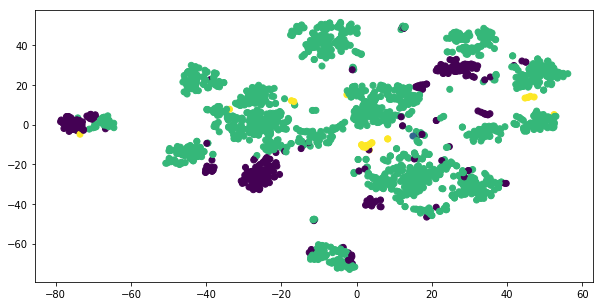

In [68]:
#Grafico de los datos en 2d con las etiquetas
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels[0]) #Se agregan los labels de los clusters
plt.show()

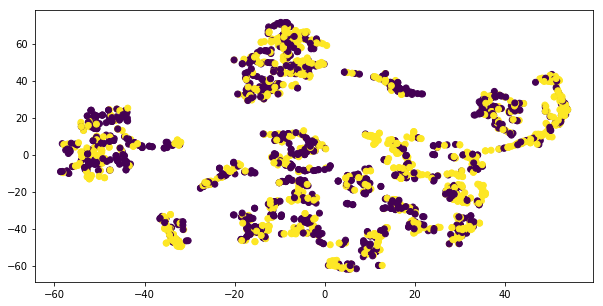

In [23]:
#Grafico de los datos en 2d con la función objetivo como label
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y) #Se agregan los labels de los clusters
plt.show()

In [48]:
#Normalización de los datos
scaler=StandardScaler()
scaler.fit(X)
X_norm=pnd.DataFrame(data=scaler.transform(X), columns=X.keys())

In [49]:
X_norm

,GENERO,RENTA,EDAD,COD_COM,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,...,Aval,CAS,SEP,SOL,VIU,MED,TEC,UNV,EUN,BAS
0,-1.196991,-0.563440,1.400568,-0.955312,-0.348443,-0.821810,-0.131182,-0.074944,-0.529897,-0.474403,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,1.584626,-0.675169,-0.804778,-0.073621,-0.060057
1,-1.196991,-0.239215,1.893460,-0.955312,-0.348443,-0.815619,15.082293,-0.305304,-0.599360,-0.474403,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,1.584626,-0.675169,-0.804778,-0.073621,-0.060057
2,-1.196991,-0.535725,0.661230,-0.917410,-0.348443,0.336569,-0.131182,-0.305304,-0.608181,-0.474403,...,-0.520839,-1.248447,4.344537,-0.646401,-0.219141,-0.631064,1.481110,-0.804778,-0.073621,-0.060057
3,0.835428,-0.107238,0.414784,-0.879509,-0.348443,0.684443,-0.131182,-0.305304,-0.601014,0.185486,...,-0.520839,-1.248447,4.344537,-0.646401,-0.219141,-0.631064,-0.675169,1.242578,-0.073621,-0.060057
4,0.835428,0.376680,-0.324554,-0.841608,-0.348443,-0.638274,-0.131182,3.236610,3.780165,0.449442,...,1.919978,0.800995,-0.230174,-0.646401,-0.219141,-0.631064,-0.675169,1.242578,-0.073621,-0.060057
5,-1.196991,-0.217219,-1.680006,-0.803707,-0.348443,0.411845,-0.131182,-0.305304,-0.527140,-0.474403,...,-0.520839,-1.248447,-0.230174,1.547027,-0.219141,1.584626,-0.675169,-0.804778,-0.073621,-0.060057
6,0.835428,-0.448620,0.414784,-0.879509,-0.348443,-0.047494,-0.131182,-0.303759,-0.608181,-0.474403,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,-0.631064,-0.675169,1.242578,-0.073621,-0.060057
7,0.835428,-0.240975,1.154122,-0.955312,-0.348443,-0.815619,-0.131182,-0.305304,-0.608181,-0.210447,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,-0.631064,-0.675169,1.242578,-0.073621,-0.060057
8,-1.196991,-0.542764,-0.571000,-0.765806,-0.348443,0.797443,-0.131182,-0.084986,-0.440035,-0.474403,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,1.584626,-0.675169,-0.804778,-0.073621,-0.060057
9,0.835428,-0.465777,0.907676,-0.727904,-0.348443,-0.563256,-0.131182,-0.227066,-0.545333,-0.474403,...,-0.520839,0.800995,-0.230174,-0.646401,-0.219141,-0.631064,-0.675169,1.242578,-0.073621,-0.060057


In [25]:
#Clusters con KMeans
clusterer = KMeans(n_clusters=15, random_state=10)
cluster_labels = clusterer.fit_predict(X_norm)

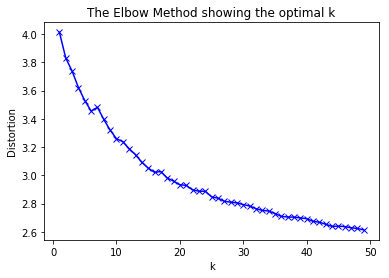

In [26]:

#Kmeans
# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
#Visualizacion de los datos mediante t-distributed Stochastic Neighbor Embedding con datos normalizados.
X_embedded_kmeans = TSNE(n_components=2).fit_transform(X_norm)

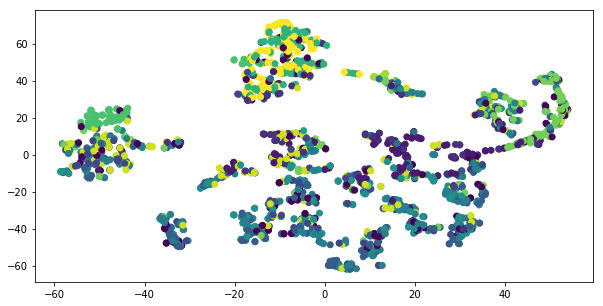

In [28]:
#etiquetas de KMeans
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels) #Se agregan los labels de los clusters
plt.show()

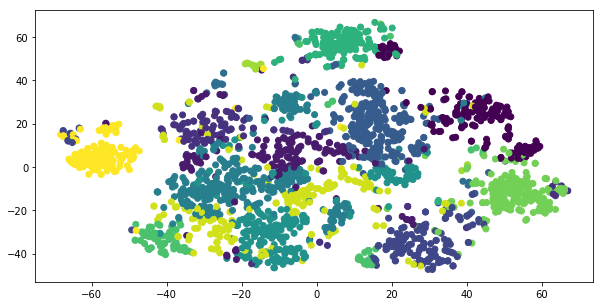

In [29]:
#etiquetas de KMeans
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_kmeans[:, 0], X_embedded_kmeans[:, 1], c=cluster_labels) #Se agregan los labels de los clusters
plt.show()

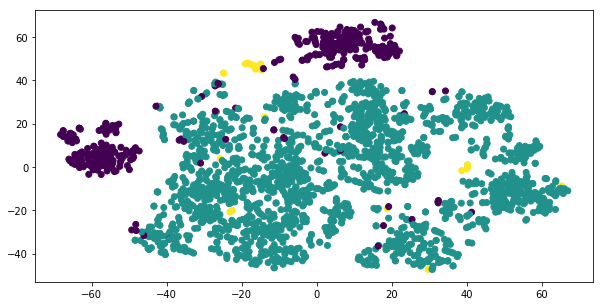

In [31]:
#etiquetas de aglomerativo
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_kmeans[:, 0], X_embedded_kmeans[:, 1], c=labels[0]) #Se agregan los labels de los clusters
plt.show()

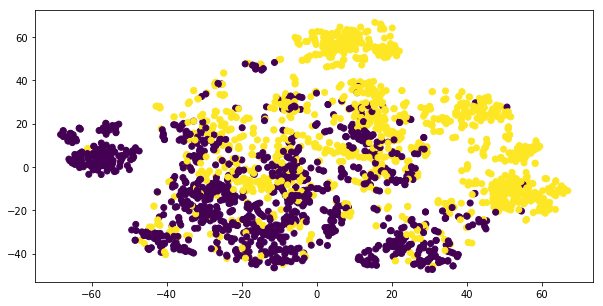

In [32]:
#etiquetas de función objetivo
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_kmeans[:, 0], X_embedded_kmeans[:, 1], c=y) #Se agregan los labels de los clusters
plt.show()

In [71]:
cluster_res = clean_clients.copy()
cluster_res['labels'] = labels.copy()

In [73]:
cluster_1 = cluster_res[cluster_res['labels'] == 1]
cluster_2 = cluster_res[cluster_res['labels'] == 2]
cluster_3 = cluster_res[cluster_res['labels'] == 3]
cluster_4 = cluster_res[cluster_res['labels'] == 4]

In [74]:
print(len(cluster_res), len(cluster_1) + len(cluster_2) + len(cluster_3) + len(cluster_4))

2240 2172


In [75]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
cluster_res.to_excel(path + "limpio_labels.xlsx")

In [51]:

cluster_none = cluster_res[(cluster_res['labels'] != 1) & (cluster_res['labels'] != 3) & (cluster_res['labels'] != 2)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16111198>]],
      dtype=object)

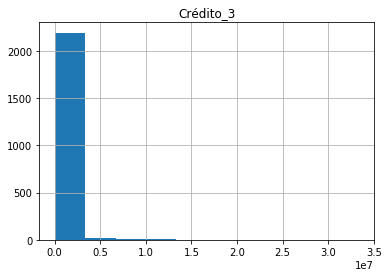

In [76]:
cluster_res.hist(u'Crédito_3')

In [53]:
matrix

array([[7.60000000e+02, 7.66000000e+02, 6.08276253e+00, 2.00000000e+00],
       [1.99400000e+03, 2.00000000e+03, 6.16441400e+00, 2.00000000e+00],
       [1.77400000e+03, 1.78300000e+03, 1.10000000e+01, 2.00000000e+00],
       ...,
       [1.87100000e+03, 4.47300000e+03, 7.02062304e+07, 3.55000000e+02],
       [4.47400000e+03, 4.47500000e+03, 1.02120524e+08, 1.88500000e+03],
       [4.47600000e+03, 4.47700000e+03, 1.38583568e+08, 2.24000000e+03]])